In [6]:
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from model import Net
from torchvision import transforms

sys.path.insert(0, '../..')
from load import load
from train import train, eval
from utils import plot_learningcurve, get_metrics
from dataset import psf_dataset, splitDataLoader, ToTensor, Normalize

In [7]:
model = Net()

# GPU support
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)
    model.to(device)

In [8]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [9]:
# Data set
data_dir = '../../dataset/'
dataset_size = 100000
dataset = psf_dataset(
                      root_dir = data_dir,
                      size = dataset_size,
                      transform = transforms.Compose([Normalize(data_dir),ToTensor()])
                     )

In [ ]:
train(
      model, 
      dataset, 
      optimizer, 
      criterion,
      split = [0.99, 0.01],
      batch_size = 64,
      n_epoch = 200,
      random_seed = 42,
      model_dir = './',
      visdom = False  
     )

Training started on cuda:0
[1/200] Train loss: 4154.750412 
[1/200] Validation loss: 4240.281189 
[1/200] Time: 163.916280 s
------------------------------
[2/200] Train loss: 1724.682574 
[2/200] Validation loss: 1759.901672 
[2/200] Time: 155.217421 s
------------------------------
[3/200] Train loss: 950.836562 
[3/200] Validation loss: 967.775299 
[3/200] Time: 158.860541 s
------------------------------
[4/200] Train loss: 621.554884 
[4/200] Validation loss: 642.733782 
[4/200] Time: 150.937040 s
------------------------------
[5/200] Train loss: 548.587400 
[5/200] Validation loss: 565.010431 
[5/200] Time: 154.904440 s
------------------------------
[6/200] Train loss: 480.157250 
[6/200] Validation loss: 495.191513 
[6/200] Time: 160.772099 s
------------------------------
[7/200] Train loss: 442.970350 
[7/200] Validation loss: 457.823572 
[7/200] Time: 165.803598 s
------------------------------
[8/200] Train loss: 450.682847 
[8/200] Validation loss: 466.241056 
[8/200] Tim

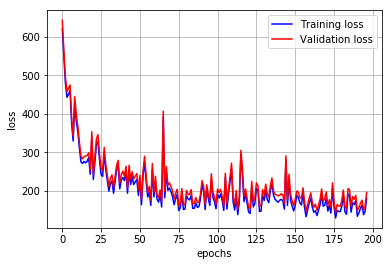

In [12]:
metrics = get_metrics()
plot_learningcurve(metrics, start=3)